In [ ]:
# Description: Plot Figure 5 (Depth-averaged spectra of Reynolds stresses).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        December/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import DataArray, open_dataset
from pyspec.spectrum import block_avg, yNlu

In [3]:
def spec_error(E,sn,ci=.95):

    """ Computes confidence interval for one-dimensional spectral
        estimate E.

        Parameters
        ===========
        - sn is the number of spectral realizations;
                it can be either an scalar or an array of size(E)
        - ci = .95 for 95 % confidence interval

        Output
        ==========
        lower (El) and upper (Eu) bounds on E """

    dbin = .005
    yN = np.arange(0,2.+dbin,dbin)

    El, Eu = np.empty_like(E), np.empty_like(E)

    yNl,yNu = yNlu(sn,yN=yN,ci=ci)
    El = E/yNl
    Eu = E/yNu

    return El, Eu


def block_avgz(A, dts, Nblks):
    nz, nt = A.shape
    for k in range(nz):
        a = A[k, :]
        fg = np.isfinite(a)
        if not fg.any():
            S = np.vstack((S, Saa.f*np.nan))
            continue
        a[~fg] = np.nanmean(a)
        Saa, nblks = block_avg(a, dts, N=Nblks);
        if k==0:
            S = Saa.spec
        else:
            S = np.vstack((S, Saa.spec[np.newaxis, ...]))
    f = Saa.f

    dof = 2*nblks
    # return f, dof, S
    return f, dof, np.nanmean(S, axis=0)


def avg_deployments_specs(f1, f2, S1, S2):
    fl = 0
    fr = np.maximum(f1[-1], f2[-1])
    # nf = np.maximum(f1.size, f2.size)
    # f = np.linspace(fl, fr, num=nf)
    df = np.minimum(np.diff(f1).mean(), np.diff(f2).mean())
    f = np.arange(fl, fr + df, df)
    S1 = np.interp(f, f1, S1)
    S2 = np.interp(f, f2, S2)
    S = 0.5*(S1 + S2)

    return f, S

In [4]:
plt.close('all')

head = "../../data_reproduce_figs/"
min2d = 1/60/24

dts = 10*min2d # [days]
Nblks = 2

In [5]:
#----- OC25SA
ds1OC25SA = open_dataset(head+'OC25SA-Ad1rs5-10min_ensembles-nobinmap-bias-corrected.nc')
ds2OC25SA = open_dataset(head+'OC25SA-Ad2rs5-10min_ensembles-nobinmap-bias-corrected.nc')

#----- OC25SB
ds2OC25SB = open_dataset(head+'OC25SB-Ad2rs5-10min_ensembles-nobinmap-bias-corrected.nc')

#----- OC25M
ds1OC25M = open_dataset(head+'OC25M-Ad1rs5-10min_ensembles-nobinmap.nc')
ds2OC25M = open_dataset(head+'OC25M-Ad2rs5-10min_ensembles-nobinmap.nc')

#----- OC40S
ds1OC40S = open_dataset(head+'OC40S-Ad1rs5-10min_ensembles-nobinmap-bias-corrected.nc')
ds2OC40S = open_dataset(head+'OC40S-Ad2rs5-10min_ensembles-nobinmap-bias-corrected.nc')

#----- OC40N
ds1OC40N = open_dataset(head+'OC40N-Ad1rs5-10min_ensembles-nobinmap-bias-corrected.nc')

In [6]:
# Calculate all spectra for u'w' and v'w'.

#--- OC25SA
uw1 = ds1OC25SA['uw'].values
vw1 = ds1OC25SA['vw'].values
uw2 = ds2OC25SA['uw'].values
vw2 = ds2OC25SA['vw'].values

f1, dof1, Suw1 = block_avgz(uw1, dts, Nblks)
f1, dof1, Svw1 = block_avgz(vw1, dts, Nblks)
f2, dof2, Suw2 = block_avgz(uw2, dts, Nblks)
f2, dof2, Svw2 = block_avgz(vw2, dts, Nblks)
dof_OC25SA = np.minimum(dof1, dof2)

# Average spectra from the two deployments together.
f_OC25SA, Suw_OC25SA = avg_deployments_specs(f1, f2, Suw1, Suw2)
f_OC25SA, Svw_OC25SA = avg_deployments_specs(f1, f2, Svw1, Svw2)

#--- OC25M
uw1 = ds1OC25M['uw'].values
vw1 = ds1OC25M['vw'].values
uw2 = ds2OC25M['uw'].values
vw2 = ds2OC25M['vw'].values

f1, dof1, Suw1 = block_avgz(uw1, dts, Nblks)
f1, dof1, Svw1 = block_avgz(vw1, dts, Nblks)
f2, dof2, Suw2 = block_avgz(uw2, dts, Nblks)
f2, dof2, Svw2 = block_avgz(vw2, dts, Nblks)
dof_OC25M = np.minimum(dof1, dof2)

# Average spectra from the two deployments together.
f_OC25M, Suw_OC25M = avg_deployments_specs(f1, f2, Suw1, Suw2)
f_OC25M, Svw_OC25M = avg_deployments_specs(f1, f2, Svw1, Svw2)

#--- OC40S
uw1 = ds1OC40S['uw'].values
vw1 = ds1OC40S['vw'].values
uw2 = ds2OC40S['uw'].values
vw2 = ds2OC40S['vw'].values

f1, dof1, Suw1 = block_avgz(uw1, dts, Nblks)
f1, dof1, Svw1 = block_avgz(vw1, dts, Nblks)
f2, dof2, Suw2 = block_avgz(uw2, dts, Nblks)
f2, dof2, Svw2 = block_avgz(vw2, dts, Nblks)
dof_OC40S = np.minimum(dof1, dof2)

# Average spectra from the two deployments together.
f_OC40S, Suw_OC40S = avg_deployments_specs(f1, f2, Suw1, Suw2)
f_OC40S, Svw_OC40S = avg_deployments_specs(f1, f2, Svw1, Svw2)

#--- OC25SB
uw2 = ds2OC25SB['uw'].values
vw2 = ds2OC25SB['vw'].values

f_OC25SB, dof_OC25SB, Suw_OC25SB = block_avgz(uw2, dts, Nblks)
f_OC25SB, dof_OC25SB, Svw_OC25SB = block_avgz(vw2, dts, Nblks)

#--- OC40N
uw1 = ds1OC40N['uw'].values
vw1 = ds1OC40N['vw'].values

f_OC40N, dof_OC40N, Suw_OC40N = block_avgz(uw1, dts, Nblks)
f_OC40N, dof_OC40N, Svw_OC40N = block_avgz(vw1, dts, Nblks)

In [7]:
alpha = 0.95
El_OC25SAuw, Eu_OC25SAuw = spec_error(Suw_OC25SA, dof_OC25SA//2, ci=alpha)
El_OC25SAvw, Eu_OC25SAvw = spec_error(Svw_OC25SA, dof_OC25SA//2, ci=alpha)
El_OC25SBuw, Eu_OC25SBuw = spec_error(Suw_OC25SB, dof_OC25SB//2, ci=alpha)
El_OC25SBvw, Eu_OC25SBvw = spec_error(Svw_OC25SB, dof_OC25SB//2, ci=alpha)
El_OC25Muw, Eu_OC25Muw = spec_error(Suw_OC25M, dof_OC25M//2, ci=alpha)
El_OC25Mvw, Eu_OC25Mvw = spec_error(Svw_OC25M, dof_OC25M//2, ci=alpha)
El_OC40Suw, Eu_OC40Suw = spec_error(Suw_OC40S, dof_OC40S//2, ci=alpha)
El_OC40Svw, Eu_OC40Svw = spec_error(Svw_OC40S, dof_OC40S//2, ci=alpha)
El_OC40Nuw, Eu_OC40Nuw = spec_error(Suw_OC40N, dof_OC40N//2, ci=alpha)
El_OC40Nvw, Eu_OC40Nvw = spec_error(Svw_OC40N, dof_OC40N//2, ci=alpha)

El_OC25SAuw, Eu_OC25SAuw = El_OC25SAuw[1:], Eu_OC25SAuw[1:]
El_OC25SAvw, Eu_OC25SAvw = El_OC25SAvw[1:], Eu_OC25SAvw[1:]
El_OC25SBuw, Eu_OC25SBuw = El_OC25SBuw[1:], Eu_OC25SBuw[1:]
El_OC25SBvw, Eu_OC25SBvw = El_OC25SBvw[1:], Eu_OC25SBvw[1:]
El_OC25Muw, Eu_OC25Muw = El_OC25Muw[1:], Eu_OC25Muw[1:]
El_OC25Mvw, Eu_OC25Mvw = El_OC25Mvw[1:], Eu_OC25Mvw[1:]
El_OC40Suw, Eu_OC40Suw = El_OC40Suw[1:], Eu_OC40Suw[1:]
El_OC40Svw, Eu_OC40Svw = El_OC40Svw[1:], Eu_OC40Svw[1:]
El_OC40Nuw, Eu_OC40Nuw = El_OC40Nuw[1:], Eu_OC40Nuw[1:]
El_OC40Nvw, Eu_OC40Nvw = El_OC40Nvw[1:], Eu_OC40Nvw[1:]

Text(0, 1, '[(m$^2$/s$^2$)$^2$/cpd]')

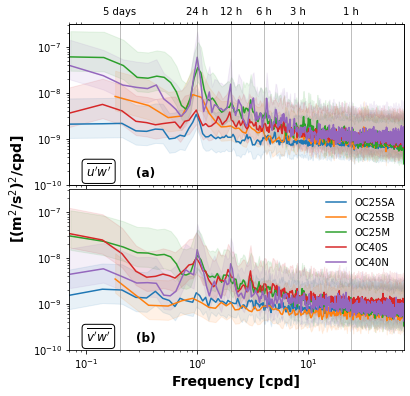

In [8]:
# Plotting.

figsize = (6, 6)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=figsize)
l1 = ax[0].loglog(f_OC25SA[1:], Suw_OC25SA[1:], label=r"OC25SA")
l2 = ax[0].loglog(f_OC25SB[1:], Suw_OC25SB[1:], label=r"OC25SB")
l3 = ax[0].loglog(f_OC25M[1:], Suw_OC25M[1:], label=r"OC25M")
l4 = ax[0].loglog(f_OC40S[1:], Suw_OC40S[1:], label=r"OC40S")
l5 = ax[0].loglog(f_OC40N[1:], Suw_OC40N[1:], label=r"OC40N")

ax[0].fill_between(f_OC25SA[1:], El_OC25SAuw, y2=Eu_OC25SAuw, color=l1[0].get_color(), alpha=0.1)
ax[0].fill_between(f_OC25SB[1:], El_OC25SBuw, y2=Eu_OC25SBuw, color=l2[0].get_color(), alpha=0.1)
ax[0].fill_between(f_OC25M[1:], El_OC25Muw, y2=Eu_OC25Muw, color=l3[0].get_color(), alpha=0.1)
ax[0].fill_between(f_OC40S[1:], El_OC40Suw, y2=Eu_OC40Suw, color=l4[0].get_color(), alpha=0.1)
ax[0].fill_between(f_OC40N[1:], El_OC40Nuw, y2=Eu_OC40Nuw, color=l5[0].get_color(), alpha=0.1)

l1 = ax[1].loglog(f_OC25SA[1:], Svw_OC25SA[1:], label=r"OC25SA")
l2 = ax[1].loglog(f_OC25SB[1:], Svw_OC25SB[1:], label=r"OC25SB")
l3 = ax[1].loglog(f_OC25M[1:], Svw_OC25M[1:], label=r"OC25M")
l4 = ax[1].loglog(f_OC40S[1:], Svw_OC40S[1:], label=r"OC40S")
l5 = ax[1].loglog(f_OC40N[1:], Svw_OC40N[1:], label=r"OC40N")
ax[1].legend(frameon=False)

ax[1].fill_between(f_OC25SA[1:], El_OC25SAvw, y2=Eu_OC25SAvw, color=l1[0].get_color(), alpha=0.1)
ax[1].fill_between(f_OC25SB[1:], El_OC25SBvw, y2=Eu_OC25SBvw, color=l2[0].get_color(), alpha=0.1)
ax[1].fill_between(f_OC25M[1:], El_OC25Mvw, y2=Eu_OC25Mvw, color=l3[0].get_color(), alpha=0.1)
ax[1].fill_between(f_OC40S[1:], El_OC40Svw, y2=Eu_OC40Svw, color=l4[0].get_color(), alpha=0.1)
ax[1].fill_between(f_OC40N[1:], El_OC40Nvw, y2=Eu_OC40Nvw, color=l5[0].get_color(), alpha=0.1)

ax[0].set_xlim(f_OC25SA[1], f_OC25SA[-1])
ax[1].set_xlim(f_OC25SA[1], f_OC25SA[-1])

axtop = ax[0].twiny()
axtop.set_xscale('log')
xl = ax[0].get_xlim()
axtop.set_xlim(xl)

periods_annot = np.array([60*min2d, 60*3*min2d, 60*6*min2d, 60*12*min2d, 60*24*min2d, 60*24*5*min2d]) # 1 h, 3 h, 6 h, 12 h, 24 h, 5 days.
periods_labels = ['1 h', '3 h', '6 h', '12 h', '24 h', '5 days']
freqs_annot = 1/periods_annot
_ = [ax[0].axvline(l, color='gray', linewidth=0.5) for l in freqs_annot]
_ = [ax[1].axvline(l, color='gray', linewidth=0.5) for l in freqs_annot]

axtop.xaxis.set_ticks(freqs_annot)
axtop.xaxis.set_ticklabels(periods_labels)

xt, yt = 0.2, 0.05
ax[0].text(xt, yt, r"(a)", fontsize=12, fontweight='black', transform=ax[0].transAxes)
ax[1].text(xt, yt, r"(b)", fontsize=12, fontweight='black', transform=ax[1].transAxes)

xt, yt = 0.05, 0.05
ax[0].text(xt, yt, r"$\overline{u'w'}$", fontsize=12, fontweight='bold', transform=ax[0].transAxes, bbox=dict(boxstyle="round", fc='w'))
ax[1].text(xt, yt, r"$\overline{v'w'}$", fontsize=12, fontweight='bold', transform=ax[1].transAxes, bbox=dict(boxstyle="round", fc='w'))

fig.subplots_adjust(hspace=0.025)

ax[1].set_xlabel(r"Frequency [cpd]", fontsize=14, fontweight='black')
ax[1].set_ylabel(r"[(m$^2$/s$^2$)$^2$/cpd]", fontsize=14, fontweight='black', y=1)

In [9]:
fig.savefig("fig05.png", dpi=300, bbox_inches="tight")
plt.show()